## 0. Import Libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from xclim import sdba
from glob import glob
from shapely.geometry import mapping

import xclim
import utils


%load_ext autoreload
%autoreload 2
%reload_ext autoreload

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


## 1. Open Data

In [2]:
# change if needed
bias_algo = 'QDM' # EQM or QDM

path_general = r'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data'
path_coeff = r'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/data/bias_correction'
season = 'JJA' # DJF or JJA

### 1.1 Model

In [3]:
year_range = np.arange(1985, 2006)
yearly_paths = glob(fr'{path_general}/cosmo/yearly/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_1hr*')
yearly_paths = yearly_paths[:21] # drop clipped and merged data, check here
yearly_paths

['/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1985.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1986.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1987.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1988.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1989.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1990.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1991.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1992.nc',
 '/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM

### 1.2 Change 0 values

In [6]:
wet_hour_mm = 0.1

for year, year_path in enumerate(yearly_paths):
    
    # open data
    dt_model = xr.open_dataset(year_path)
    
    print('data open')
    
    # adjust model values below threshold to 0 (burayı ayrı bir yerde yap)
    dt_model['scen'] = dt_model['scen'].where(dt_model['scen']>wet_hour_mm, 
                                        0
                                       )

    dt_model.to_netcdf(fr"{path_general}/cosmo/yearly/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_1hr_zeroed_{year_range[year]}.nc",
                              )
    
    print(year_path)

data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1985.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1986.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1987.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1988.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1989.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1990.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1991.nc
data open
/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_era5land_Tr011_MPI_RF_PR_JJA_1hr_1992.nc
data open
/mnt/e/Jupyter

In [8]:
dt_model = xr.open_dataset(year_path)

In [ ]:
# check the data
dt_model['scen'].transpose('time', 'rlat', 'rlon').sum(dim='time').plot()

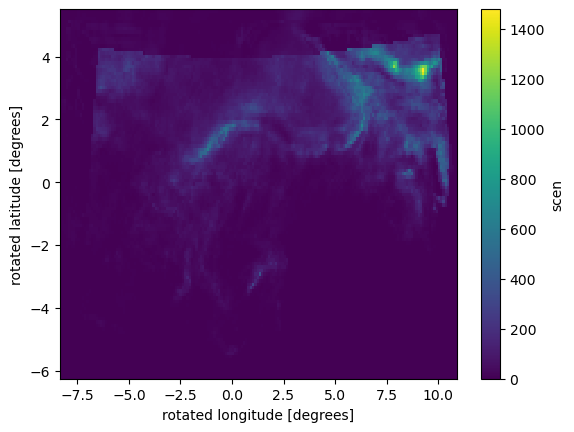

In [5]:
# check the data
dt_model['scen'].transpose('time', 'rlat', 'rlon').sum(dim='time').plot()